In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [94]:
data = pd.read_csv("3w.csv")

Features and Target variables

In [95]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# For 3W Uncomment the below line
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','Bus','HCV','LCV','Total']].values

# For HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values

target = data['SD'].values

Normalize data

In [96]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [98]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [99]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
22/22 [==============================] - 2s 20ms/step - loss: 326.2268 - val_loss: 319.6353
Epoch 2/800
22/22 [==============================] - 0s 4ms/step - loss: 221.9335 - val_loss: 73.7664
Epoch 3/800
22/22 [==============================] - 0s 4ms/step - loss: 61.4779 - val_loss: 33.4344
Epoch 4/800
22/22 [==============================] - 0s 4ms/step - loss: 44.1536 - val_loss: 29.9483
Epoch 5/800
22/22 [==============================] - 0s 4ms/step - loss: 42.2944 - val_loss: 29.6325
Epoch 6/800
22/22 [==============================] - 0s 4ms/step - loss: 40.8612 - val_loss: 31.2426
Epoch 7/800
22/22 [==============================] - 0s 4ms/step - loss: 40.2716 - val_loss: 25.9935
Epoch 8/800
22/22 [==============================] - 0s 4ms/step - loss: 38.6547 - val_loss: 26.2741
Epoch 9/800
22/22 [==============================] - 0s 4ms/step - loss: 37.6314 - val_loss: 26.6891
Epoch 10/800
22/22 [==============================] - 0s 4ms/step - loss: 39.0271 - val

Visualize LSTM results

0.6211761756495626


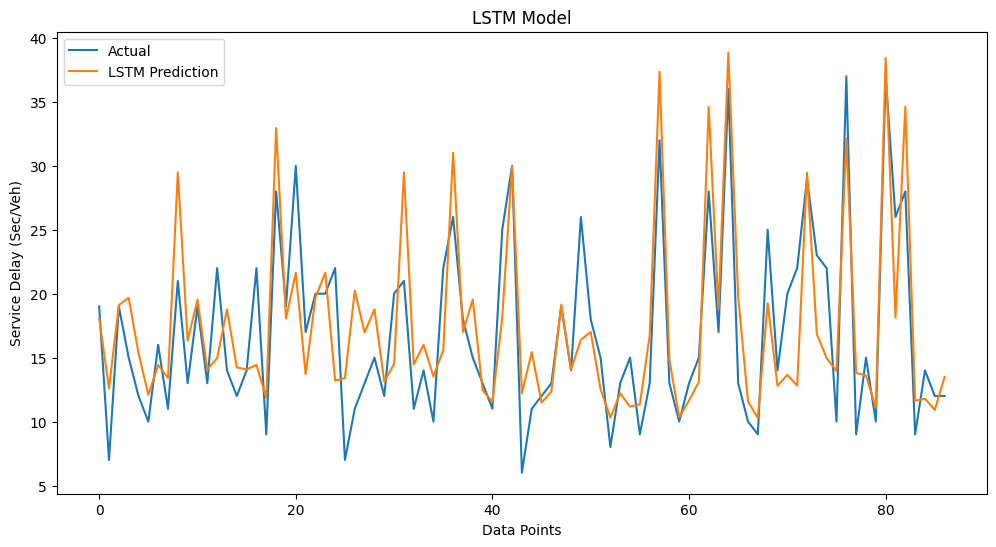

In [100]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [142]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/500
11/11 [==============================] - 3s 38ms/step - loss: 330.2393 - val_loss: 333.5564
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 318.0437 - val_loss: 307.4060
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 253.2541 - val_loss: 113.6342
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 89.3530 - val_loss: 56.0747
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 70.5585 - val_loss: 43.9874
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 43.7409 - val_loss: 42.9352
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 38.5849 - val_loss: 30.9740
Epoch 8/500
11/11 [==============================] - 0s 7ms/step - loss: 31.4233 - val_loss: 31.1091
Epoch 9/500
11/11 [==============================] - 0s 7ms/step - loss: 31.4141 - val_loss: 24.1151
Epoch 10/500
11/11 [==============================] - 0s 7ms/step - loss: 29.1594 - 

Visualize BiLSTM results

0.6398601670263702


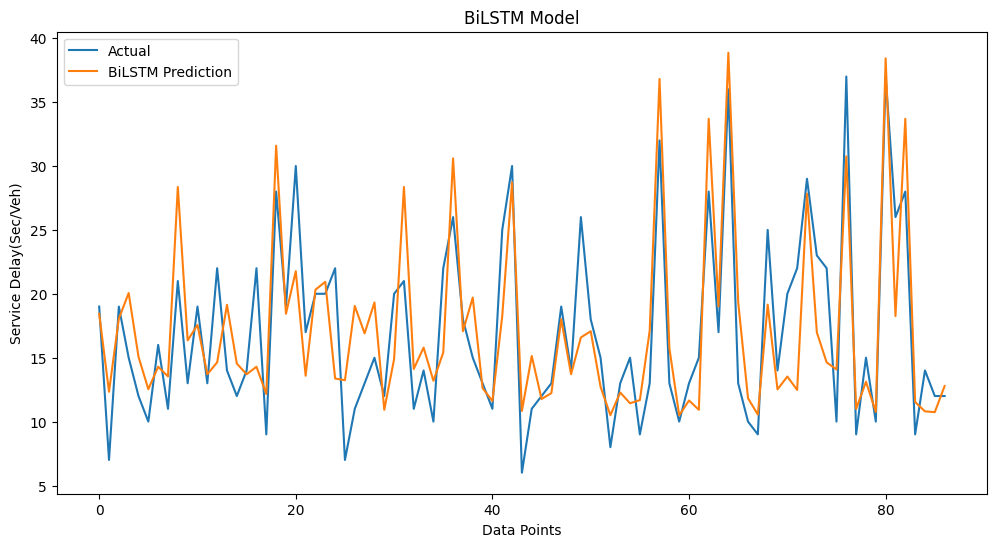

In [143]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [144]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/500
22/22 [==============================] - 2s 13ms/step - loss: 324.4983 - val_loss: 316.3871
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 229.4716 - val_loss: 32.3240
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 49.3455 - val_loss: 24.1038
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 36.8574 - val_loss: 23.6883
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 36.7121 - val_loss: 23.5538
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 36.2458 - val_loss: 23.4688
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 36.5204 - val_loss: 23.7893
Epoch 8/500
22/22 [==============================] - 0s 4ms/step - loss: 35.9689 - val_loss: 23.3649
Epoch 9/500
22/22 [==============================] - 0s 4ms/step - loss: 36.1262 - val_loss: 25.4608
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 35.8529 - val

Visualize GRU results

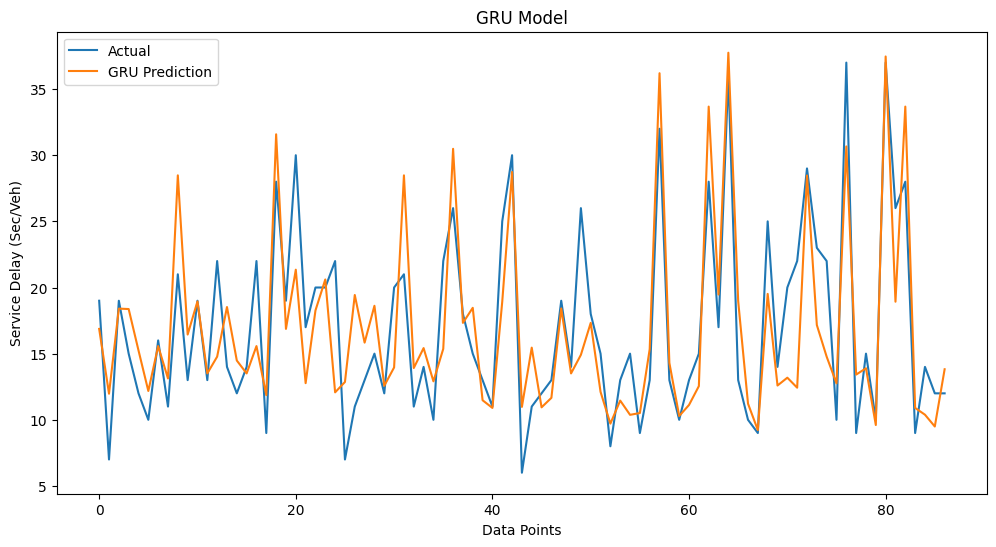

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [127]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/500
22/22 [==============================] - 4s 27ms/step - loss: 317.7316 - val_loss: 289.8251
Epoch 2/500
22/22 [==============================] - 0s 6ms/step - loss: 149.5754 - val_loss: 28.9060
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 37.7996 - val_loss: 24.4418
Epoch 4/500
22/22 [==============================] - 0s 6ms/step - loss: 30.4596 - val_loss: 18.1598
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 27.8231 - val_loss: 17.8922
Epoch 6/500
22/22 [==============================] - 0s 8ms/step - loss: 27.6832 - val_loss: 18.7988
Epoch 7/500
22/22 [==============================] - 0s 8ms/step - loss: 27.1222 - val_loss: 18.7090
Epoch 8/500
22/22 [==============================] - 0s 6ms/step - loss: 27.5918 - val_loss: 19.7334
Epoch 9/500
22/22 [==============================] - 0s 6ms/step - loss: 27.1944 - val_loss: 18.5619
Epoch 10/500
22/22 [==============================] - 0s 6ms/step - loss: 27.0211 - val

Visualize BiGRU results

0.6429610469950611


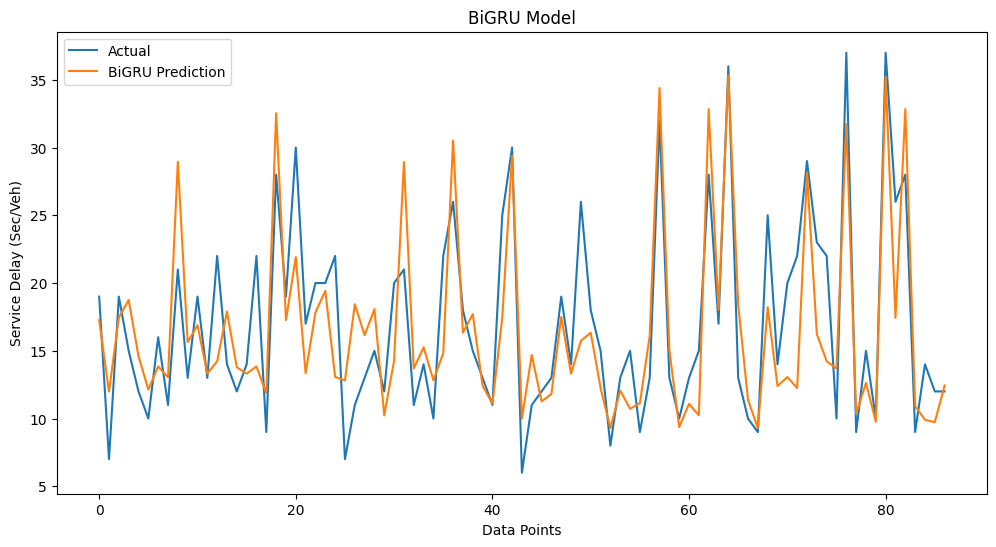

In [128]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [107]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
22/22 [==============================] - 1s 7ms/step - loss: 312.2270 - val_loss: 289.9189
Epoch 2/800
22/22 [==============================] - 0s 2ms/step - loss: 236.1116 - val_loss: 166.9949
Epoch 3/800
22/22 [==============================] - 0s 2ms/step - loss: 94.8883 - val_loss: 29.1918
Epoch 4/800
22/22 [==============================] - 0s 2ms/step - loss: 33.6538 - val_loss: 19.9223
Epoch 5/800
22/22 [==============================] - 0s 2ms/step - loss: 30.0328 - val_loss: 19.0096
Epoch 6/800
22/22 [==============================] - 0s 3ms/step - loss: 29.3136 - val_loss: 18.3907
Epoch 7/800
22/22 [==============================] - 0s 2ms/step - loss: 28.8323 - val_loss: 18.1811
Epoch 8/800
22/22 [==============================] - 0s 3ms/step - loss: 28.5269 - val_loss: 18.1560
Epoch 9/800
22/22 [==============================] - 0s 2ms/step - loss: 28.4604 - val_loss: 18.0779
Epoch 10/800
22/22 [==============================] - 0s 3ms/step - loss: 28.1511 - val

Visualize CNN results

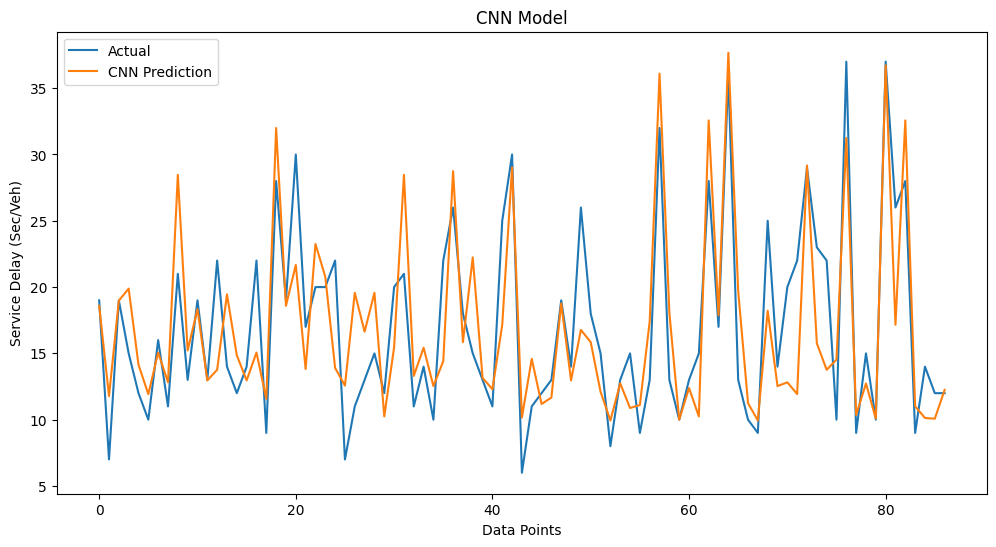

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [109]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
22/22 [==============================] - 1s 10ms/step - loss: 327.2720 - val_loss: 323.6054
Epoch 2/800
22/22 [==============================] - 0s 3ms/step - loss: 275.5621 - val_loss: 175.2943
Epoch 3/800
22/22 [==============================] - 0s 3ms/step - loss: 82.7908 - val_loss: 38.5217
Epoch 4/800
22/22 [==============================] - 0s 2ms/step - loss: 44.5922 - val_loss: 37.3089
Epoch 5/800
22/22 [==============================] - 0s 3ms/step - loss: 40.0675 - val_loss: 29.8697
Epoch 6/800
22/22 [==============================] - 0s 3ms/step - loss: 36.4335 - val_loss: 27.4914
Epoch 7/800
22/22 [==============================] - 0s 3ms/step - loss: 34.9311 - val_loss: 25.1291
Epoch 8/800
22/22 [==============================] - 0s 3ms/step - loss: 33.8897 - val_loss: 22.6352
Epoch 9/800
22/22 [==============================] - 0s 3ms/step - loss: 31.9686 - val_loss: 21.6341
Epoch 10/800
22/22 [==============================] - 0s 3ms/step - loss: 31.8580 - va

Visualize CNN_LSTM results

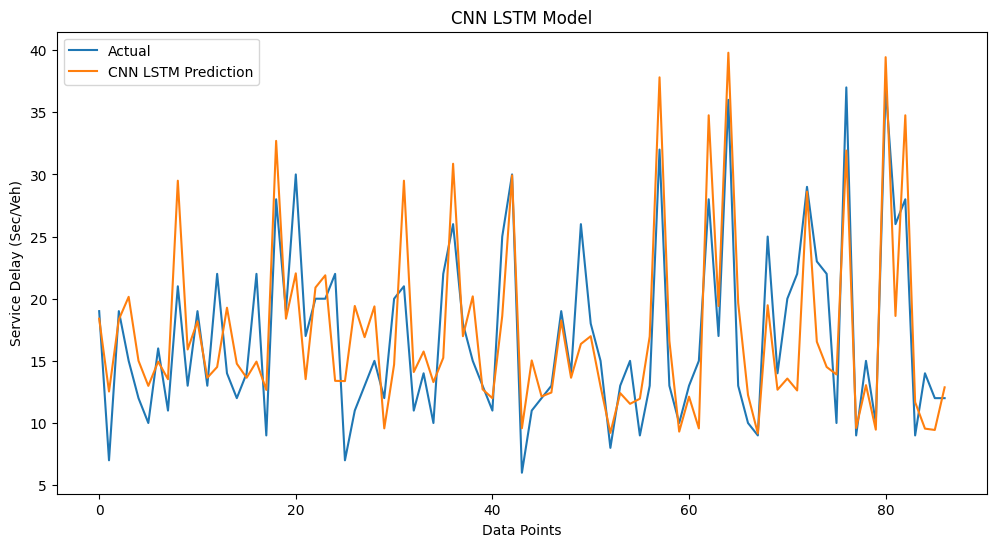

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [111]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
22/22 [==============================] - 2s 14ms/step - loss: 322.6589 - val_loss: 311.0221
Epoch 2/800
22/22 [==============================] - 0s 3ms/step - loss: 242.5639 - val_loss: 72.8130
Epoch 3/800
22/22 [==============================] - 0s 3ms/step - loss: 50.8449 - val_loss: 40.8459
Epoch 4/800
22/22 [==============================] - 0s 3ms/step - loss: 37.9174 - val_loss: 31.0057
Epoch 5/800
22/22 [==============================] - 0s 3ms/step - loss: 32.2322 - val_loss: 25.6998
Epoch 6/800
22/22 [==============================] - 0s 3ms/step - loss: 28.6793 - val_loss: 22.2820
Epoch 7/800
22/22 [==============================] - 0s 4ms/step - loss: 27.2849 - val_loss: 20.8611
Epoch 8/800
22/22 [==============================] - 0s 3ms/step - loss: 26.6663 - val_loss: 19.8255
Epoch 9/800
22/22 [==============================] - 0s 3ms/step - loss: 26.4890 - val_loss: 18.6641
Epoch 10/800
22/22 [==============================] - 0s 4ms/step - loss: 26.3276 - val

Visualize CNN_BiLSTM results

0.6269888693444685


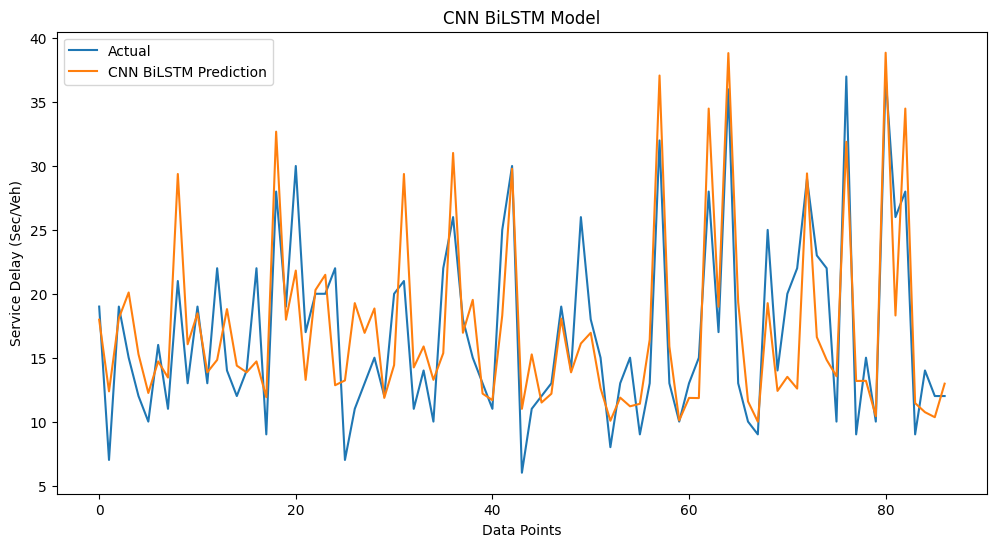

In [112]:
print(r2_cnn_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [145]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

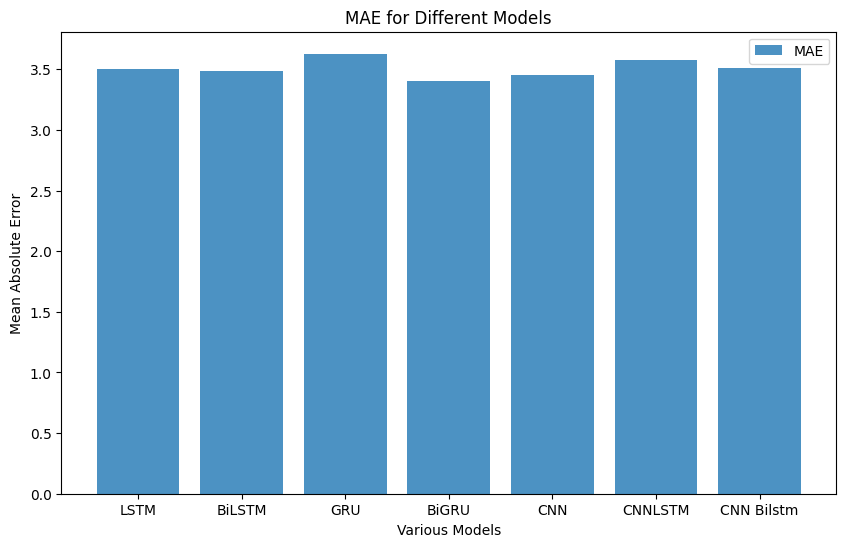

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

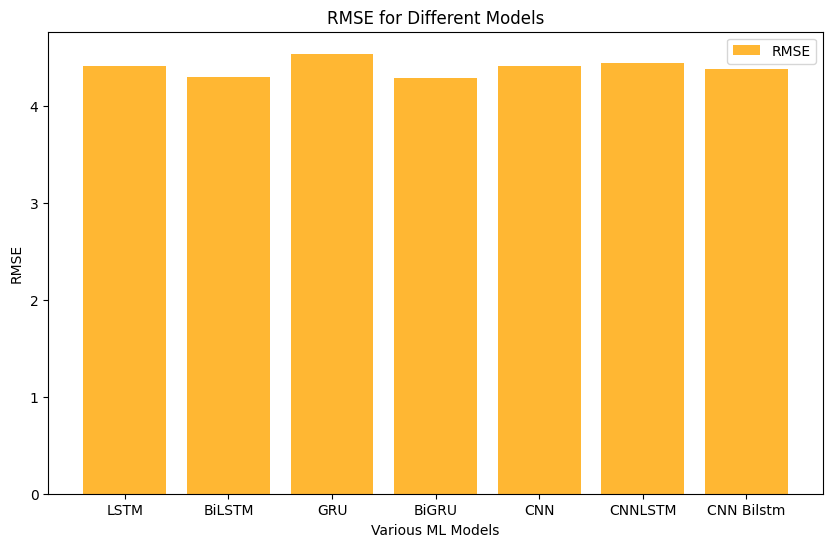

In [147]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

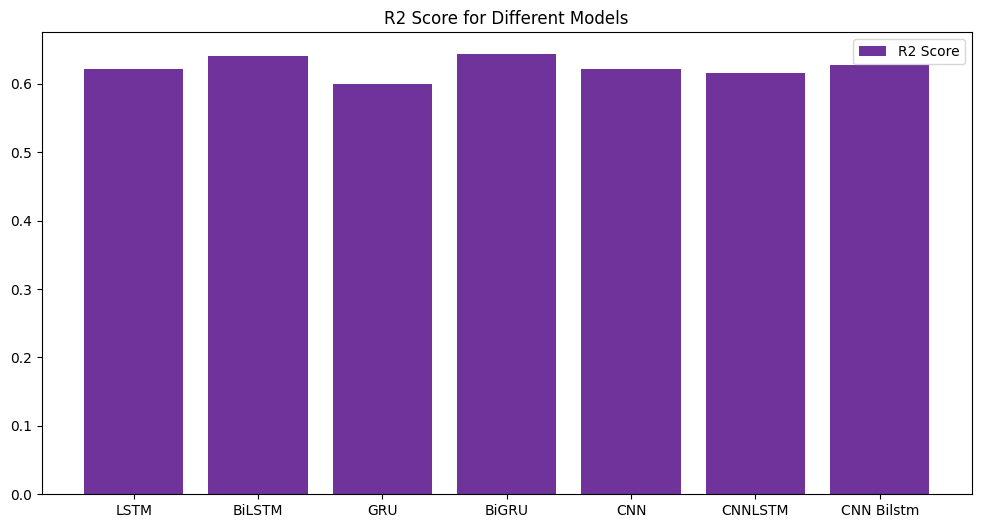

In [148]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [149]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.5045554939357713
LSTM MSE: 4.410282745746792
LSTM R2 Score: 0.6211761756495626

BiLSTM MAE: 3.4846040681860915
BiLSTM MSE: 4.300147677703204
BiLSTM R2 Score: 0.6398601670263702

GRU MAE: 3.6287790386156105
GRU MSE: 4.536064195245603
GRU R2 Score: 0.599259900254556

BiGRU MAE: 3.4045316323466683
BiGRU MSE: 4.281595066371865
BiGRU R2 Score: 0.6429610469950611

CNN MAE: 3.4548223429712754
CNN MSE: 4.40864314295447
CNN R2 Score: 0.6214577925796174

CNN LSTM MAE: 3.576112900657215
CNN LSTM MSE: 4.441294931283623
CNN LSTM R2 Score: 0.6158298245472779

CNN BiLSTM MAE: 3.5078110311223174
CNN BiLSTM MSE: 4.376316134583525
CNN BiLSTM R2 Score: 0.6269888693444685


Plot predictions for each model

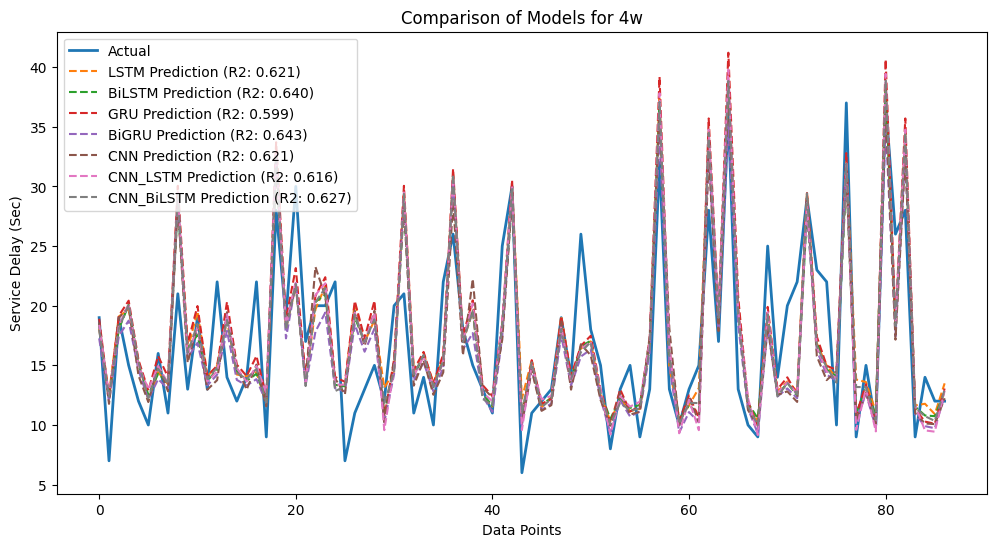

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 4w')
plt.show()

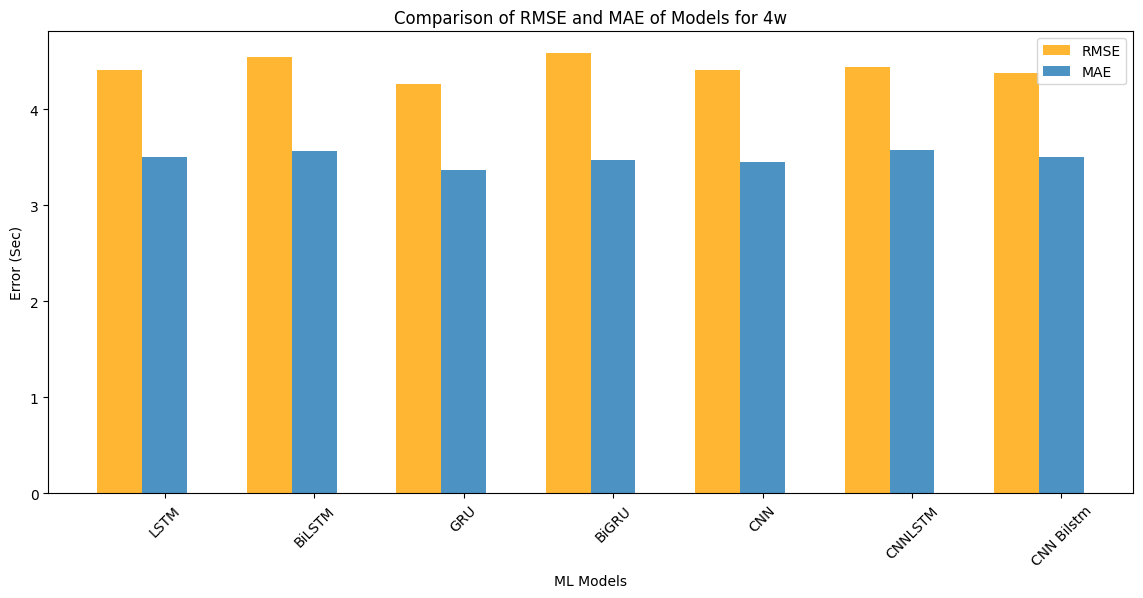

In [119]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 4w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()